In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from tqdm.std import trange

In [81]:
AllData = pd.read_csv("BTC-USD.csv")
df = pd.DataFrame(AllData)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 计算特征
df['Price_Change_Rate'] = (df['Close'] - df['Open']) / df['Open']
df['High_Change_Rate'] = (df['High'] - df['Open']) / df['Open']
df['Low_Change_Rate'] = (df['Low'] - df['Open']) / df['Open']
df['Volume_MA'] = df['Volume'].rolling(window=5).mean()


df = df.dropna()


X = df[['Open', 'Price_Change_Rate', 'High_Change_Rate', 'Low_Change_Rate', 'Volume', 'Volume_MA']]
y = df['Close']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义多项式回归模型
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train_scaled, y_train)

# 获取模型参数
coef = polyreg.named_steps['linearregression'].coef_
intercept = polyreg.named_steps['linearregression'].intercept_
feature_names = PolynomialFeatures(degree).fit(X_train_scaled).get_feature_names_out(X.columns)

# 打印多项式回归模型
print("多项式回归模型:")
print(f"y = {intercept:.2f}", end="")
for c, name in zip(coef, feature_names):
    print(f" + {c:.2f}*{name}", end="")



多项式回归模型:
y = 24897.15 + -0.00*1 + 4478.07*Open + 622.62*Price_Change_Rate + 0.00*High_Change_Rate + -0.00*Low_Change_Rate + -0.00*Volume + 0.00*Volume_MA + -0.00*Open^2 + 111.99*Open Price_Change_Rate + -0.00*Open High_Change_Rate + 0.00*Open Low_Change_Rate + -0.00*Open Volume + 0.00*Open Volume_MA + -0.00*Price_Change_Rate^2 + -0.00*Price_Change_Rate High_Change_Rate + -0.00*Price_Change_Rate Low_Change_Rate + 0.00*Price_Change_Rate Volume + -0.00*Price_Change_Rate Volume_MA + -0.00*High_Change_Rate^2 + -0.00*High_Change_Rate Low_Change_Rate + -0.00*High_Change_Rate Volume + 0.00*High_Change_Rate Volume_MA + 0.00*Low_Change_Rate^2 + -0.00*Low_Change_Rate Volume + 0.00*Low_Change_Rate Volume_MA + -0.00*Volume^2 + -0.00*Volume Volume_MA + 0.00*Volume_MA^2

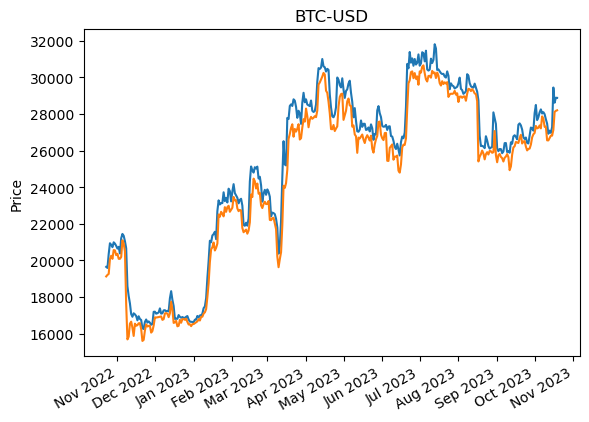

In [111]:
fig,ax = plt.subplots()

ax.plot( df['High'])
ax.plot(df['Low'])
# ax.plot(df['Open'])
# ax.plot(df['Close'])
ax.set_ylabel('Price')
ax.set_title('BTC-USD')

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
# 旋转标签以提高可读性
plt.show()

$$ 
y = 24897.15 - 0.00 \cdot 1 + 4478.07 \cdot \text{Open} + 622.62 \cdot \text{Price\_Change\_Rate} - 0.00 \cdot \text{High\_Change\_Rate} - 0.00 \cdot \text{Low\_Change\_Rate} - 0.00 \cdot \text{Volume} + 0.00 \cdot \text{Volume\_MA} - 0.00 \cdot \text{Open}^2 + 111.99 \cdot \text{Open} \cdot \text{Price\_Change\_Rate} - 0.00 \cdot \text{Open} \cdot \text{High\_Change\_Rate} + 0.00 \cdot \text{Open} \cdot \text{Low\_Change\_Rate} - 0.00 \cdot \text{Open} \cdot \text{Volume} + 0.00 \cdot \text{Open} \cdot \text{Volume\_MA} - 0.00 \cdot \text{Price\_Change\_Rate}^2 - 0.00 \cdot \text{Price\_Change\_Rate} \cdot \text{High\_Change\_Rate} - 0.00 \cdot \text{Price\_Change\_Rate} \cdot \text{Low\_Change\_Rate} + 0.00 \cdot \text{Price\_Change\_Rate} \cdot \text{Volume} - 0.00 \cdot \text{Price\_Change\_Rate} \cdot \text{Volume\_MA} - 0.00 \cdot \text{High\_Change\_Rate}^2 - 0.00 \cdot \text{High\_Change\_Rate} \cdot \text{Low\_Change\_Rate} - 0.00 \cdot \text{High\_Change\_Rate} \cdot \text{Volume} + 0.00 \cdot \text{High\_Change\_Rate} \cdot \text{Volume\_MA} + 0.00 \cdot \text{Low\_Change\_Rate}^2 - 0.00 \cdot \text{Low\_Change\_Rate} \cdot \text{Volume} + 0.00 \cdot \text{Low\_Change\_Rate} \cdot \text{Volume\_MA} - 0.00 \cdot \text{Volume}^2 - 0.00 \cdot \text{Volume} \cdot \text{Volume\_MA} + 0.00 \cdot \text{Volume\_MA}^2
$$

R^2 value for polynomial: 0.9985


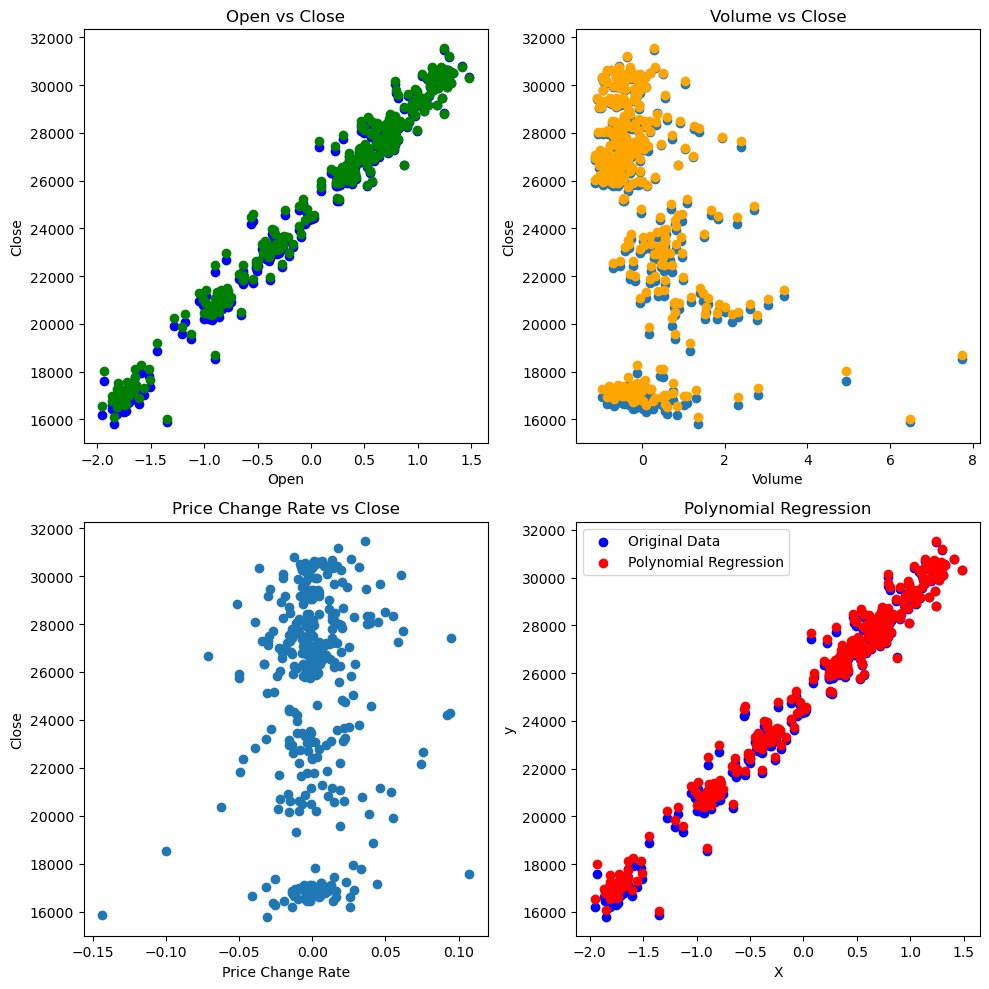

In [94]:
from sklearn.metrics import r2_score
y_pred = polyreg.predict(X_norm)
r2 = r2_score(y, y_pred)
print(f"R^2 value for polynomial: {r2:.4f}")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 绘制开盘价与收盘价的关系
axs[0, 0].scatter(X_norm[:,0], df['Close'],c='b')
axs[0, 0].scatter(X_norm[:,0], y_pred, color='green', label='PREDICT')
axs[0, 0].set_title('Open vs Close')
axs[0, 0].set_xlabel('Open')
axs[0, 0].set_ylabel('Close')

# 绘制成交量与收盘价的关系
axs[0, 1].scatter(X_norm[:,4], df['Close'])
axs[0, 1].scatter(X_norm[:,4], y_pred, color='orange', label='PREDICT')
axs[0, 1].set_title('Volume vs Close')
axs[0, 1].set_xlabel('Volume')
axs[0, 1].set_ylabel('Close')

# 计算其他特征，如价格变动率
df['Price_Change_Rate'] = (df['Close'] - df['Open']) / df['Open']

# 绘制价格变动率与收盘价的关系
axs[1, 0].scatter(df['Price_Change_Rate'], df['Close'])
axs[1, 0].set_title('Price Change Rate vs Close')
axs[1, 0].set_xlabel('Price Change Rate')
axs[1, 0].set_ylabel('Close')





axs[1, 1].scatter(X_norm[:,0], y, color='blue', label='Original Data')
axs[1, 1].scatter(X_norm[:,0], y_pred, color='red', label='Polynomial Regression')
axs[1, 1].set_title('Polynomial Regression')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('y')
axs[1, 1].legend()

# axs[1,1].scatter(X[:,0], y, color='blue', label='Original Data')
# axs[1,1].plot(X[:,0], y_pred, color='red', label='Polynomial Regression')

plt.tight_layout()
plt.show()